# Spatial graph comparisons using graphcompass visualization
### Spatial pancreas
Sander - Theis collab 

**Conditions:**
- ND: non-diabetic
- T1D: type 1 diabetic

### Requirements  

Environment ``graphcompass_v2``

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

import scanpy as sc
import squidpy as sq
import graphcompass as gc

### Load data

In [2]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
file   = 'merged_slides_npod_annotation_filtered_wlkernel_filcurves_similarities.h5ad'
adata = sc.read(filename = folder + file)
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max'
    uns: 'CellTypes_max_colors', 'CellTypes_max_fov_nhood_enrichment', 'cell_type_coarse_colors', 'filtration_curves', 'neighbors', 'pairwise_similarities', 'pca', 'spatial', 'spatial_neighbors', 'wl_kernel'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_fov'
    layers: 'counts'
    obsp: 'edge_weights', 'spatial_connectivities', 'spatial_dis

In [9]:
# Define the new order of cell type categories
new_order = ['Acinar', 'Ductal', 'Beta', 
             'Alpha', 'Endocrine', 'Fibroblasts', 
             'Endothelial', 'Immune', 'Mast']

# Reorder cell type categories
adata.obs['cell_type_coarse'] = adata.obs['cell_type_coarse'].cat.reorder_categories(new_order, ordered=True)

# Define the new order of cell type categories
new_order = ['Acinar_basal', 'Acinar_highEnz','Acinar_signal','Acinar_sigdiff',
            'Ductal','MUC5b_Ductal','Beta','Alpha','Delta','Activated_Stellate',
            'Quiescent_Stellate','Endothelial','Macrophage','Tcells']

# Reorder cell type categories
adata.obs['CellTypes_max'] = adata.obs['CellTypes_max'].cat.reorder_categories(new_order, ordered=True)


# Fix color paletes 
adata.uns['cell_type_coarse_colors'] = [
    '#2E8B57', #Acinar
    '#89CFF0', #Ductal
    '#CBC3E3', #Beta
    '#AA98A9', #Alpha
    '#CF9FFF', #Endocrine
    '#E35335', #Fibroblasts
    '#FFDB58', #Endothelial
    '#FF2400', #Immune
    '#986868', #Mast
]

adata.uns['CellTypes_max_colors'] = [
    '#2E8B57', #Acinar_basal
    '#355E3B', #Acinar_highEnz
    '#9FE2BF', #Acinar_signal
    '#009E60', #Acinar_sigdiff
    '#89CFF0', #Ductal
    '#7393B3', #MUC5b_Ductal
    '#CBC3E3', #Beta
    '#AA98A9', #Alpha
    '#CF9FFF', #Delta
    '#E35335', #Activated_Stellate
    '#F89880', #Quiescent_Stellate
    '#FFDB58', #Endothelial
    '#770737', #Macrophage
    '#FF2400', #Tcells
]

In [3]:
adata.obs.head()

,fov,Area,AspectRatio,CenterX_global_px,CenterY_global_px,Width,Height,Mean.MembraneStain,Max.MembraneStain,Mean.PanCK,...,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_NegPrb,log1p_total_counts_NegPrb,pct_counts_NegPrb,n_genes,cell_type_coarse,CellTypes_max
1_1,1_s1,3038,2.05,-25945.777778,122127.0,88,43,1830,13181,74,...,80.334728,100.000000,100.0,100.0,1,0.693147,0.418410,97,Acinar,Acinar_signal
2_1,1_s1,2507,1.34,-25566.777778,122125.0,63,47,902,5621,82,...,86.627907,100.000000,100.0,100.0,1,0.693147,0.581395,73,Acinar,Acinar_basal
3_1,1_s1,7970,1.53,-25278.777778,122102.0,142,93,1476,7846,134,...,73.144876,82.862191,100.0,100.0,3,1.386294,0.530035,197,Acinar,Endothelial
4_1,1_s1,5041,1.80,-24148.777778,122116.0,115,64,931,7451,161,...,72.619048,87.500000,100.0,100.0,2,1.098612,0.595238,142,Acinar,Acinar_highEnz
5_1,1_s1,3835,1.17,-24070.777778,122108.0,95,81,1016,7478,152,...,72.782875,88.073394,100.0,100.0,0,0.000000,0.000000,139,Acinar,Acinar_highEnz


In [4]:
# define library_key and cluster_key for computing spatial graphs using `squidpy.gr.spatial_neighbors` and 
# `squidpy.gr.nhood_enrichment` 
# spatial graphs are used by the different methods in GraphCompass

library_key="fov"
cluster_key="CellTypes_max"

# define condition_key used in comparisons
condition_key="condition" # key in adata.obs where conditions are stored

### 1. Entire graph comparison

GraphCompass provides two methods to perform holistic graph comparisons:

A. Weisfeiler-Lehman graph kernels, and  
B. filtration curves.

Both methods result in graph embeddings that can be compared against one another to obtain a broad measure of tissue architecture similarity.

#### A. Weisfeiler-Lehman graph kernels

Compute Weisfeiler-Lehman Graph Kernels to compare conditions

In [6]:
# define necessary params
control_group="ND" # reference group
metric_key="wasserstein_distance" 
method="wl_kernel"

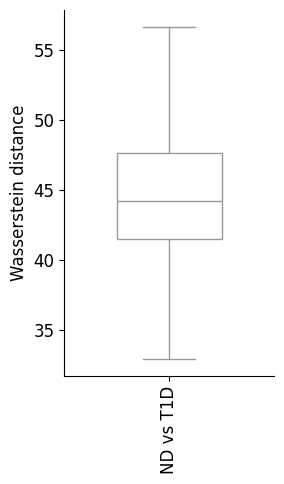

In [7]:
# Note: a smaller Wasserstein distance indicates a higher similarity between the two graphs, 
# while a larger distance indicates less similarity.

gc.pl.wlkernel.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    metric_key=metric_key,
    method=method,
    figsize=(3,5),
    dpi=100,
    #save="figures/mibitof_wwlkerenl.pdf"
)

#### Filtration curves

Compute filtration curves to compare conditions

In [10]:
len(adata.obs.CellTypes_max.cat.categories)

14

In [11]:
# define necessary params
node_labels_acinar =['Acinar_basal', 'Acinar_highEnz', 'Acinar_sigdiff', 'Acinar_signal'] 
node_labels_ductal =['Ductal', 'MUC5b_Ductal'] 
node_labels_endocrine =['Alpha', 'Beta', 'Delta'] 
node_labels_others =['Activated_Stellate', 'Endothelial', 'Macrophage', 'Quiescent_Stellate', 'Tcells']
metric_key="filtration_curves"

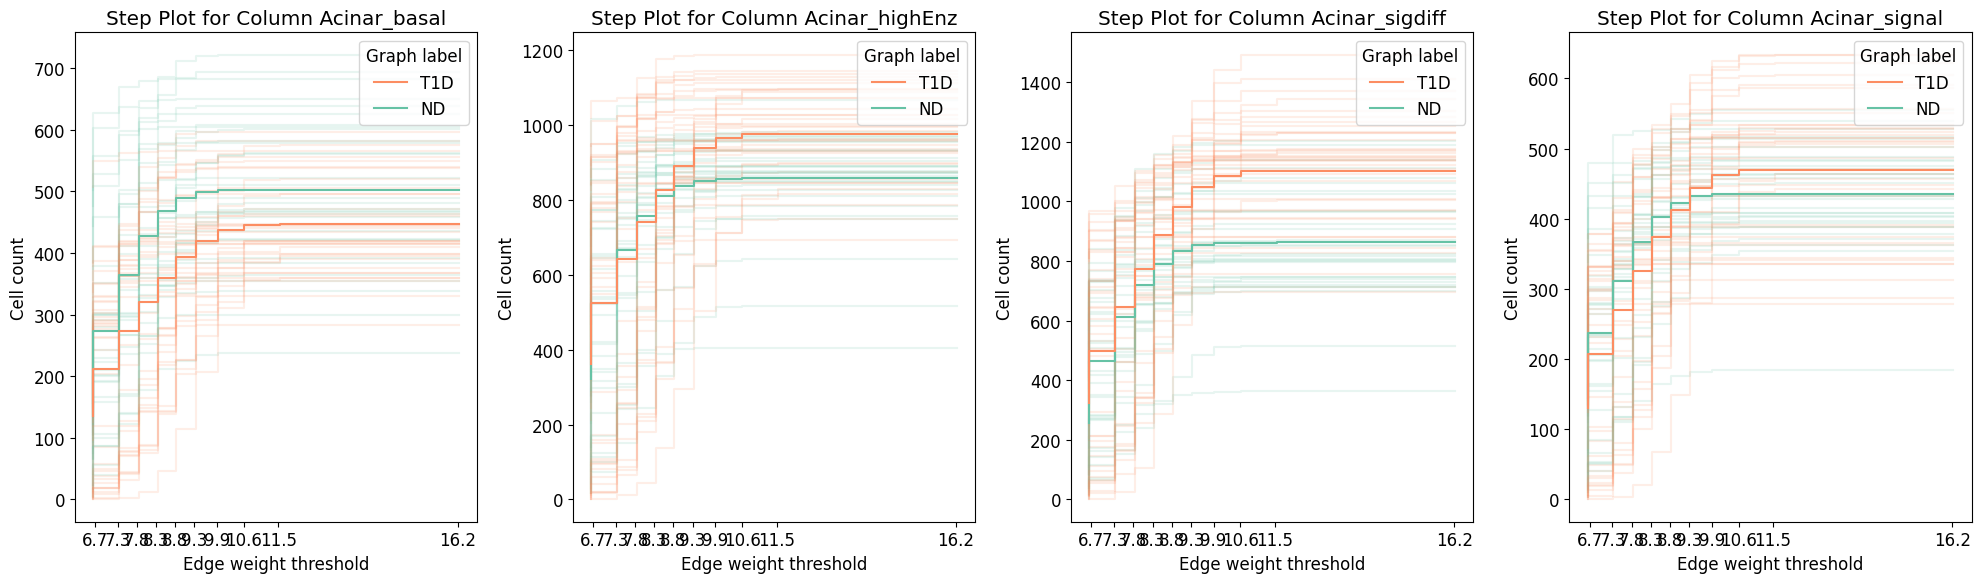

In [12]:
gc.pl.filtration_curves.compare_conditions(
    adata=adata,
    node_labels=node_labels_acinar,
    metric_key=metric_key,
    palette="Set2",
    dpi=100,
    figsize=(20,6),
    #save="figures/mibitof_filtration_curves.pdf"
)

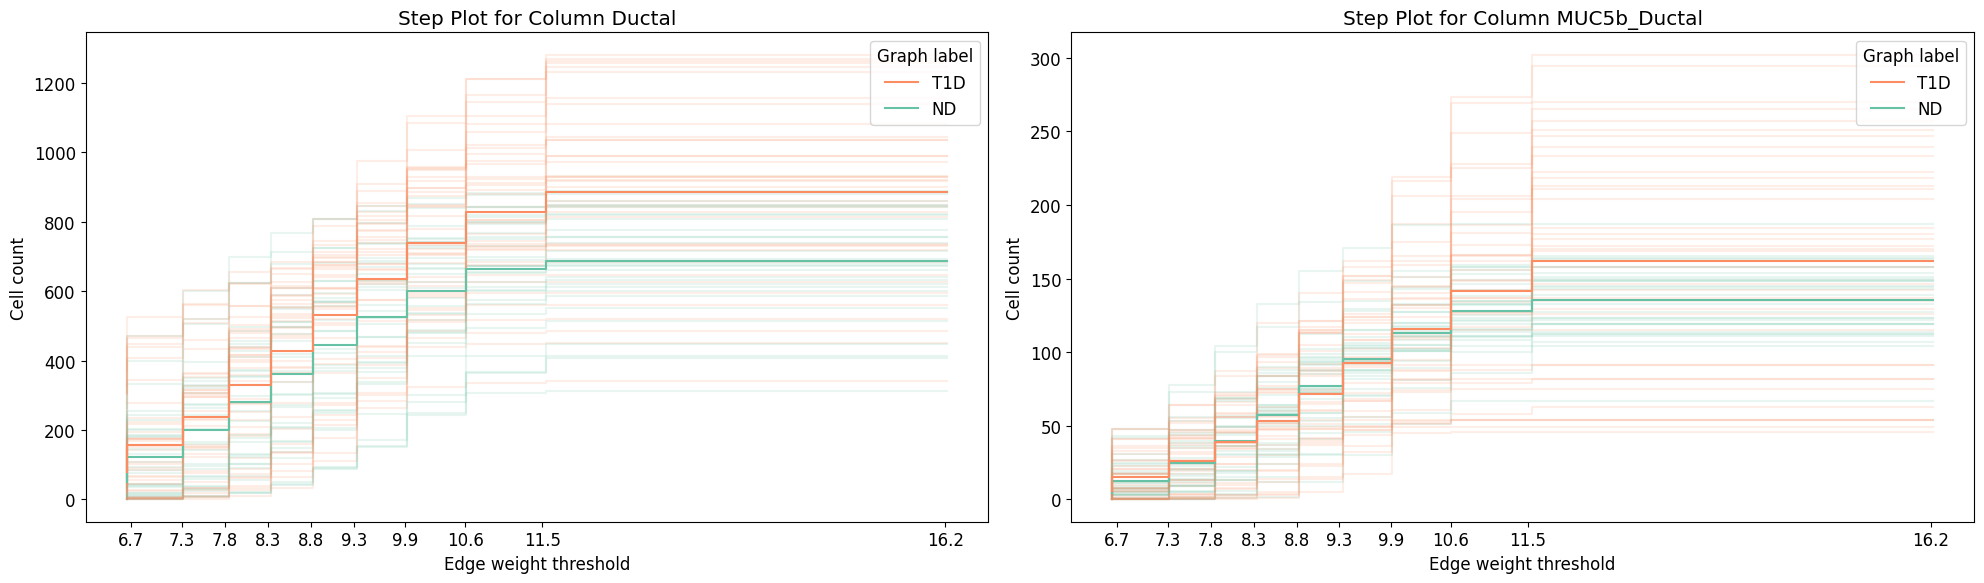

In [13]:
gc.pl.filtration_curves.compare_conditions(
    adata=adata,
    node_labels=node_labels_ductal,
    metric_key=metric_key,
    palette="Set2",
    dpi=100,
    figsize=(20,6),
    #save="figures/mibitof_filtration_curves.pdf"
)

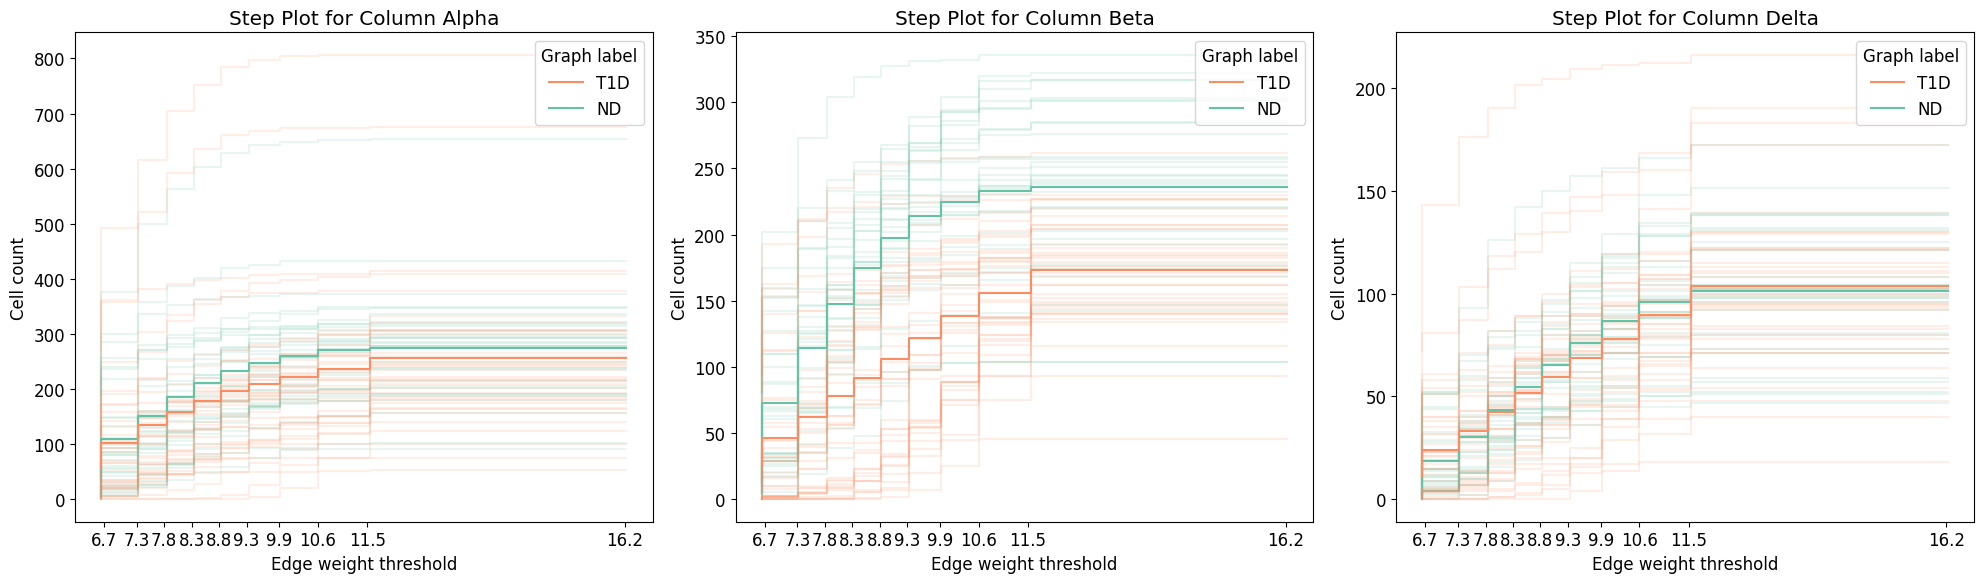

In [14]:
gc.pl.filtration_curves.compare_conditions(
    adata=adata,
    node_labels=node_labels_endocrine,
    metric_key=metric_key,
    palette="Set2",
    dpi=100,
    figsize=(20,6),
    #save="figures/mibitof_filtration_curves.pdf"
)

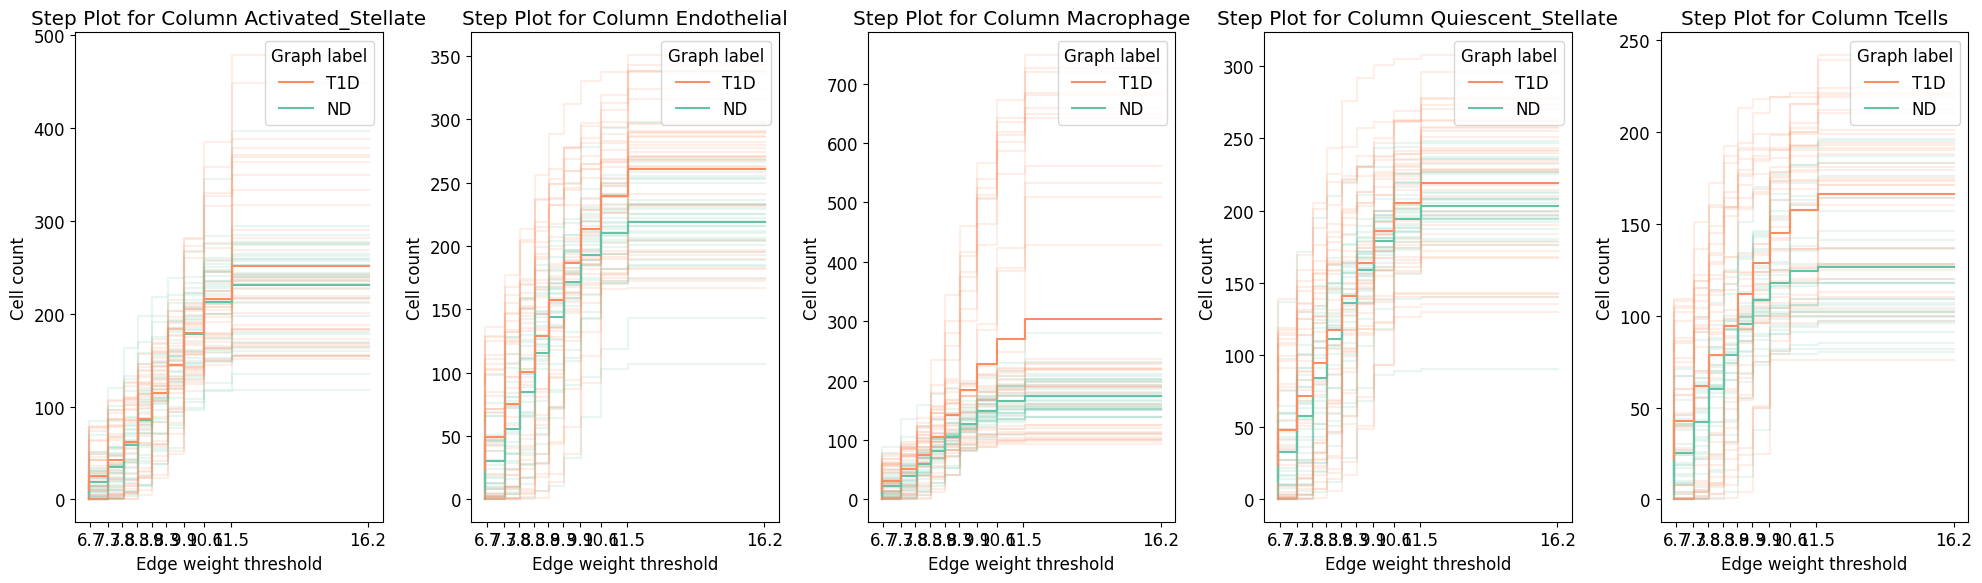

In [15]:
gc.pl.filtration_curves.compare_conditions(
    adata=adata,
    node_labels=node_labels_others,
    metric_key=metric_key,
    palette="Set2",
    dpi=100,
    figsize=(20,6),
    #save="figures/mibitof_filtration_curves.pdf"
)

### Specific-cell-type subgraphs comparison

In [5]:
# define necessary params
control_group="ND" # reference group

14it [00:38,  2.73s/it]


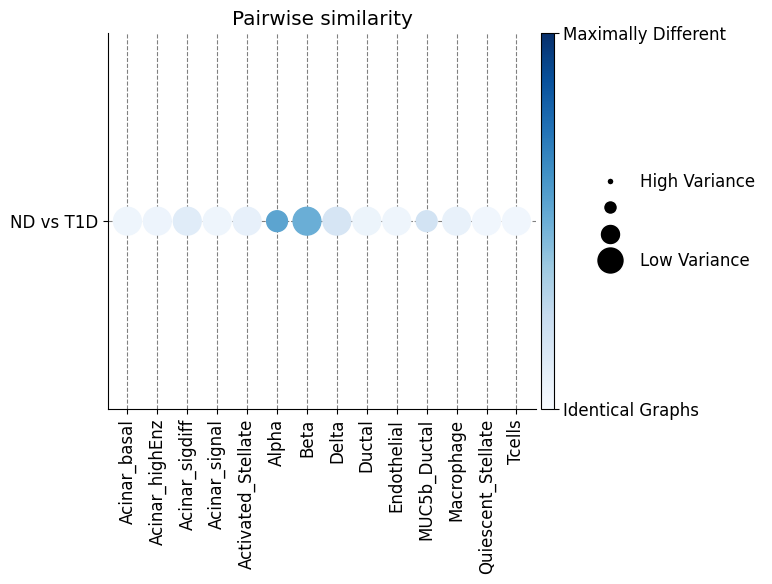

In [10]:
# Note: The size of the dot is indicative of the similarity score variance over samples. 
# The larger the dot size, the lower the score variance and the higher the score confidence is.

gc.pl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    #add_ncells_and_density_plots=True,
    #plot_groups_separately = True,  # if False then all in one plot
    palette="Blues",
    dpi=100,
    figsize=(8,6),
    save="figures/Pairwise_similarity_graphs.pdf"
)

14it [00:38,  2.73s/it]


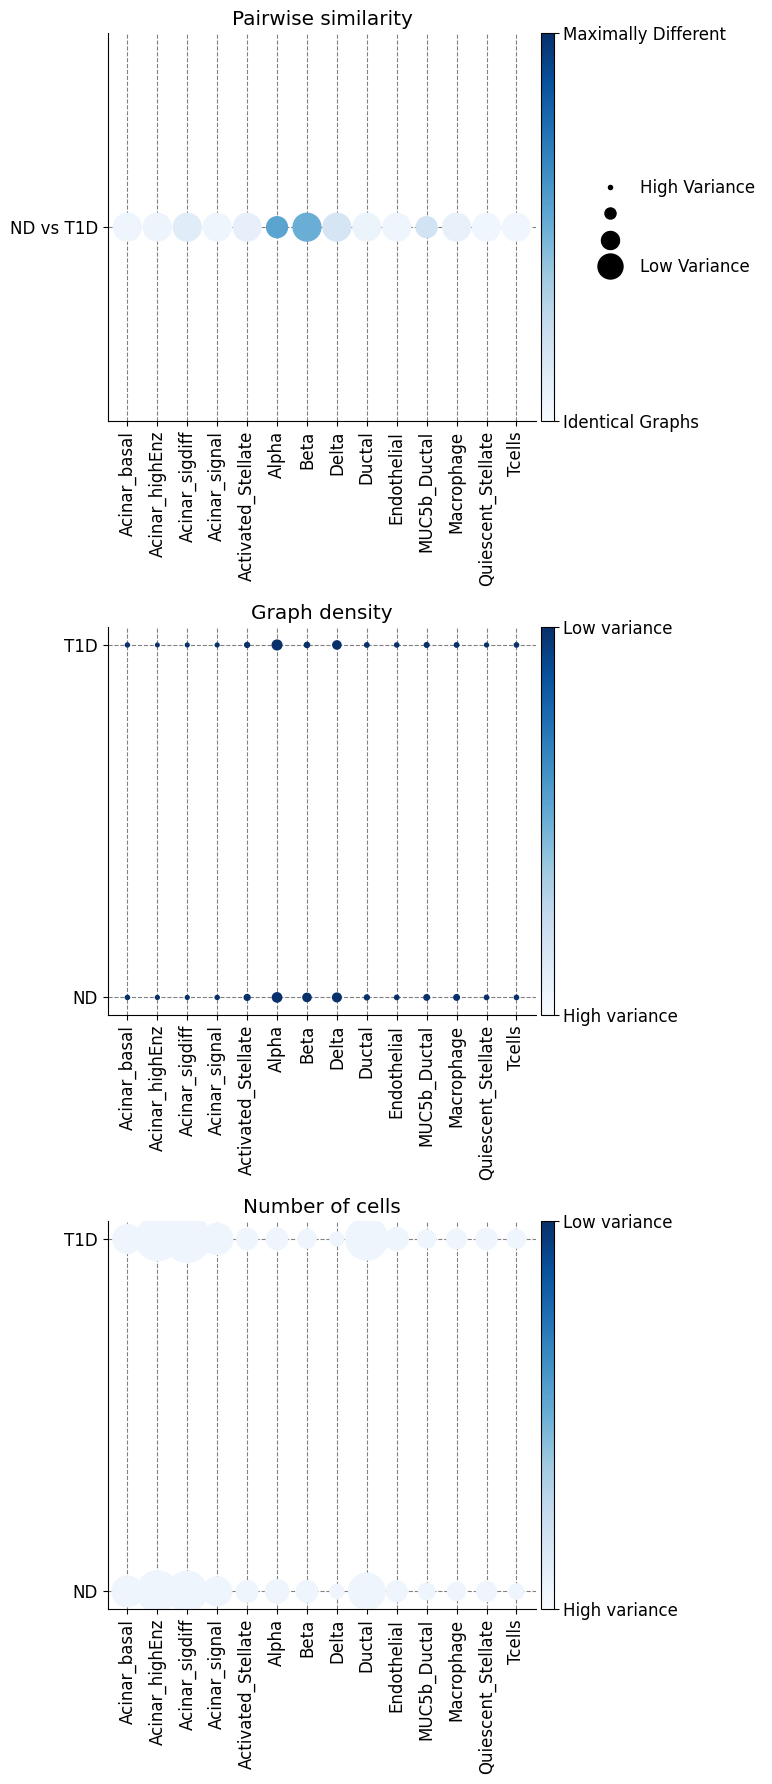

In [8]:
gc.pl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    add_ncells_and_density_plots=True,
    #plot_groups_separately = True,  # if False then all in one plot
    palette="Blues",
    dpi=100,
    figsize=(8,6),
    save="figures/Pairwise_similarity_graphs_test.pdf"
)